In [1]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;
import seaborn as sns;
import json as js;

import regex as re;

# Data Wrangling:
#####Collection
######cleaning
#######transformation

## Data Collection:

In [203]:
financial = pd.read_csv("./financial.csv", error_bad_lines=False);

# Removing spaces in column names 
columns = financial.columns.to_numpy();
new = np.array([], dtype=np.str_);
for value in columns:
    new = np.append(new, value.strip())
financial.columns = new.copy();



,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
500,Small Business,France,Amarilla,High,853,260,300,255900,25590,230310,213250,17060,lundi 1 décembre 2014,12,December,2014
501,Channel Partners,France,Carretera,High,1198,3,12,14376,"1581,36","12794,64",3594,"9200,64",mardi 1 octobre 2013,10,October,2013
502,Midmarket,Canada,Velo,High,384,120,15,5760,"633,6","5126,4",3840,"1286,4",mercredi 1 janvier 2014,1,January,2014
503,Channel Partners,Germany,Velo,High,472,120,12,5664,"623,04","5040,96",1416,"3624,96",mercredi 1 octobre 2014,10,October,2014
504,Channel Partners,Mexico,VTT,High,1005,250,12,12060,"1326,6","10733,4",3015,"7718,4",dimanche 1 septembre 2013,9,September,2013
505,Midmarket,United States of America,Amarilla,High,"3199,5",260,15,"47992,5",5279175,42713325,31995,10718325,mardi 1 juillet 2014,7,July,2014
506,Channel Partners,Germany,Amarilla,High,472,260,12,5664,"623,04","5040,96",1416,"3624,96",mercredi 1 octobre 2014,10,October,2014
507,Channel Partners,Canada,Carretera,High,1937,3,12,23244,"2556,84","20687,16",5811,"14876,16",samedi 1 février 2014,2,February,2014
508,Small Business,Germany,Carretera,High,2811,3,300,843300,92763,750537,702750,47787,mardi 1 juillet 2014,7,July,2014
509,Enterprise,France,Carretera,High,2441,3,125,305125,"33563,75","271561,25",292920,"-21358,75",mercredi 1 octobre 2014,10,October,2014


<h2 style=""></h2>

### Missing and Na values.

In [188]:
# Checking for missing values
    #consider empty strings and np.inf as null values
pd.options.mode.use_inf_as_na = True;

# Checking for missing values.
financial.isna().sum()

#Looking at data without null values
financial[financial.notna()];

# Looking at data with null values
financial.loc[financial.isna().to_numpy()];

# Removing null values from the data
financial_2 = financial.dropna(axis=0, thresh=1);

### Data Type

In [189]:
def numeric_percentage(values):
    """
    Returns the amount of numeric values from the data as a percentage.
    Parameters
    ----------
    values: numpy array, 
            pandas series, or 
            list
    Returns
    -------
    Percentage: float
        Representing the amount of numeric values from the data as a percentage.
    """
    number_values = len(values);
    numeric = 0;
    percentage = 0;
    for value in values:
        try:
            np.append(numeric, np.array(value, dtype="float16"));# Allow numpy to try to force conversion to a numeric value.
        except Exception as e:
            #print(e);
            continue;
        else:
            numeric += 1;
        percentage = (numeric/number_values)*100;
    return np.round(percentage, 2);

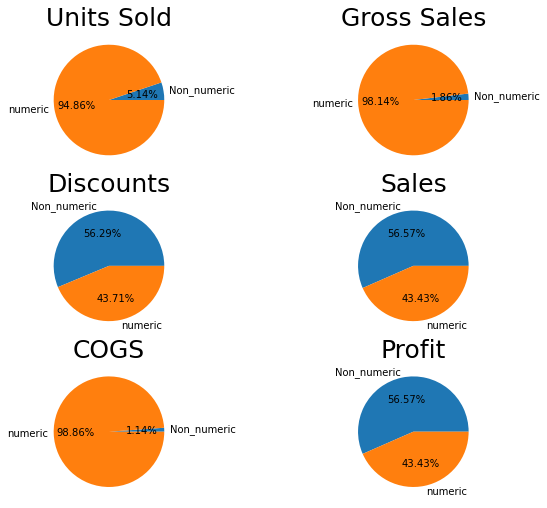

In [190]:
# Collecting features of type object.
    # columns indices of type 'object'.
indices = np.where(financial.dtypes == 'object')[0];
objects = financial.iloc[:, indices];
features_numeric_percentage = {};
# Collecting all features with at least 60% numeric data
features_numeric_percentage = {};
for feature in objects.columns.to_list():
    percentage = numeric_percentage(objects.loc[:, feature]);
    features_numeric_percentage[feature] = pd.Series({'Non_numeric': (100-percentage), 'numeric': percentage});
    
# Collecting features with at least 10% numeric values.
at_least_10_percent = np.array([], dtype=np.str_);
for feature in features_numeric_percentage.keys():
    if (features_numeric_percentage[feature]['numeric'] >= 10):
        at_least_10_percent = np.append(at_least_10_percent, feature);
french_style_data = financial.loc[:, at_least_10_percent];

# Plotting this data
keys = french_style_data.keys();
plt.figure(figsize=(10, 30))
for index, feature in enumerate(french_style_data.keys()):
    plt.subplot(10, 2, index+1);
    plt.title("{0}".format(feature), fontdict={'fontsize': 25}, pad=5);
    plt.pie(features_numeric_percentage[feature], autopct="%.2f%%", labels=features_numeric_percentage[feature].keys());

### Specific Format.

#### French format to english format.

In [207]:
def french_to_english_numeric_format(value):
    import regex as re;
    def check_and_change(text):
        #check if it matches the regex
        french_format = '[\-0-9]{0,20},[0-9]{0,20}';
        pn = re.compile(french_format);
        if pn.match(text):
            text = text.strip();
            text = text.replace(',', '.');
            text = text.replace('-', '');
            return text;
        else:
            return text;
    result = value.apply(lambda x: check_and_change(x));
    return result;

In [208]:
# Changing from french numeric notation to english notation
french_style_apply = french_style_data.apply(lambda x : french_to_english_numeric_format(x)).copy();

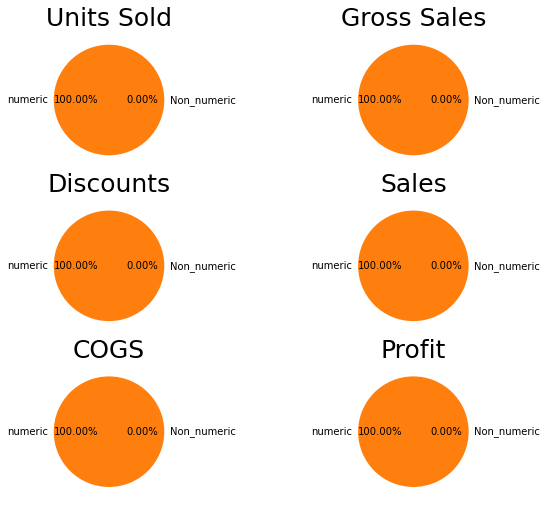

In [209]:
# Collecting features of type object.
    # columns indices of type 'object'.
indices = np.where(financial.dtypes == 'object')[0];
objects = french_style_apply;
features_numeric_percentage = {};

# Collecting all features with at least 60% numeric data
features_numeric_percentage = {};
for feature in objects.columns.to_list():
    percentage = numeric_percentage(objects.loc[:, feature]);
    features_numeric_percentage[feature] = pd.Series({'Non_numeric': (100-percentage), 'numeric': percentage});

# Plotting this data
keys = features_numeric_percentage.keys();
plt.figure(figsize=(10, 30));
for index, feature in enumerate(features_numeric_percentage.keys()):
    plt.subplot(10, 2, index+1);
    plt.title("{0}".format(feature), fontdict={'fontsize': 25}, pad=5);
    plt.pie(features_numeric_percentage[feature], autopct="%.2f%%", labels=features_numeric_percentage[feature].keys());

In [210]:
# Finally attempt to change the type into a numeric one- Float.
objects = objects.astype(dtype=np.float32).copy();

financial_clean = financial.copy();
financial_clean.loc[:, objects.columns] = objects.copy();

#### Date formating.

In [211]:
#plt.figure(figsize=(17, 6));
print(financial_clean.columns);
#plt.title("different month types");

#financial_clean.loc['Month Name'].value_counts().plot(kind='bar');
# uncomment ########
dates = financial_clean.loc[:, ['Month Number', 'Month Name', 'Year']].astype(dtype=np.str_);
dates = dates['Month Number'].str.cat( dates['Month Name'].str.cat(dates["Year"], sep=" ") , sep=" ").copy();
financial_clean["Date"] = dates.copy();
financial_clean = financial_clean.drop(columns=['Month Number', 'Month Name', 'Year']).copy();

financial_clean['Date'] = pd.DatetimeIndex(financial_clean['Date']).copy();
financial_clean.shape

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


(700, 13)

### Range constrain.

### Uniqueness.

### Set membership.

In [212]:
# Getting all Categorical features.

All the categories are correctly spelled and there is no overlapping of naming.


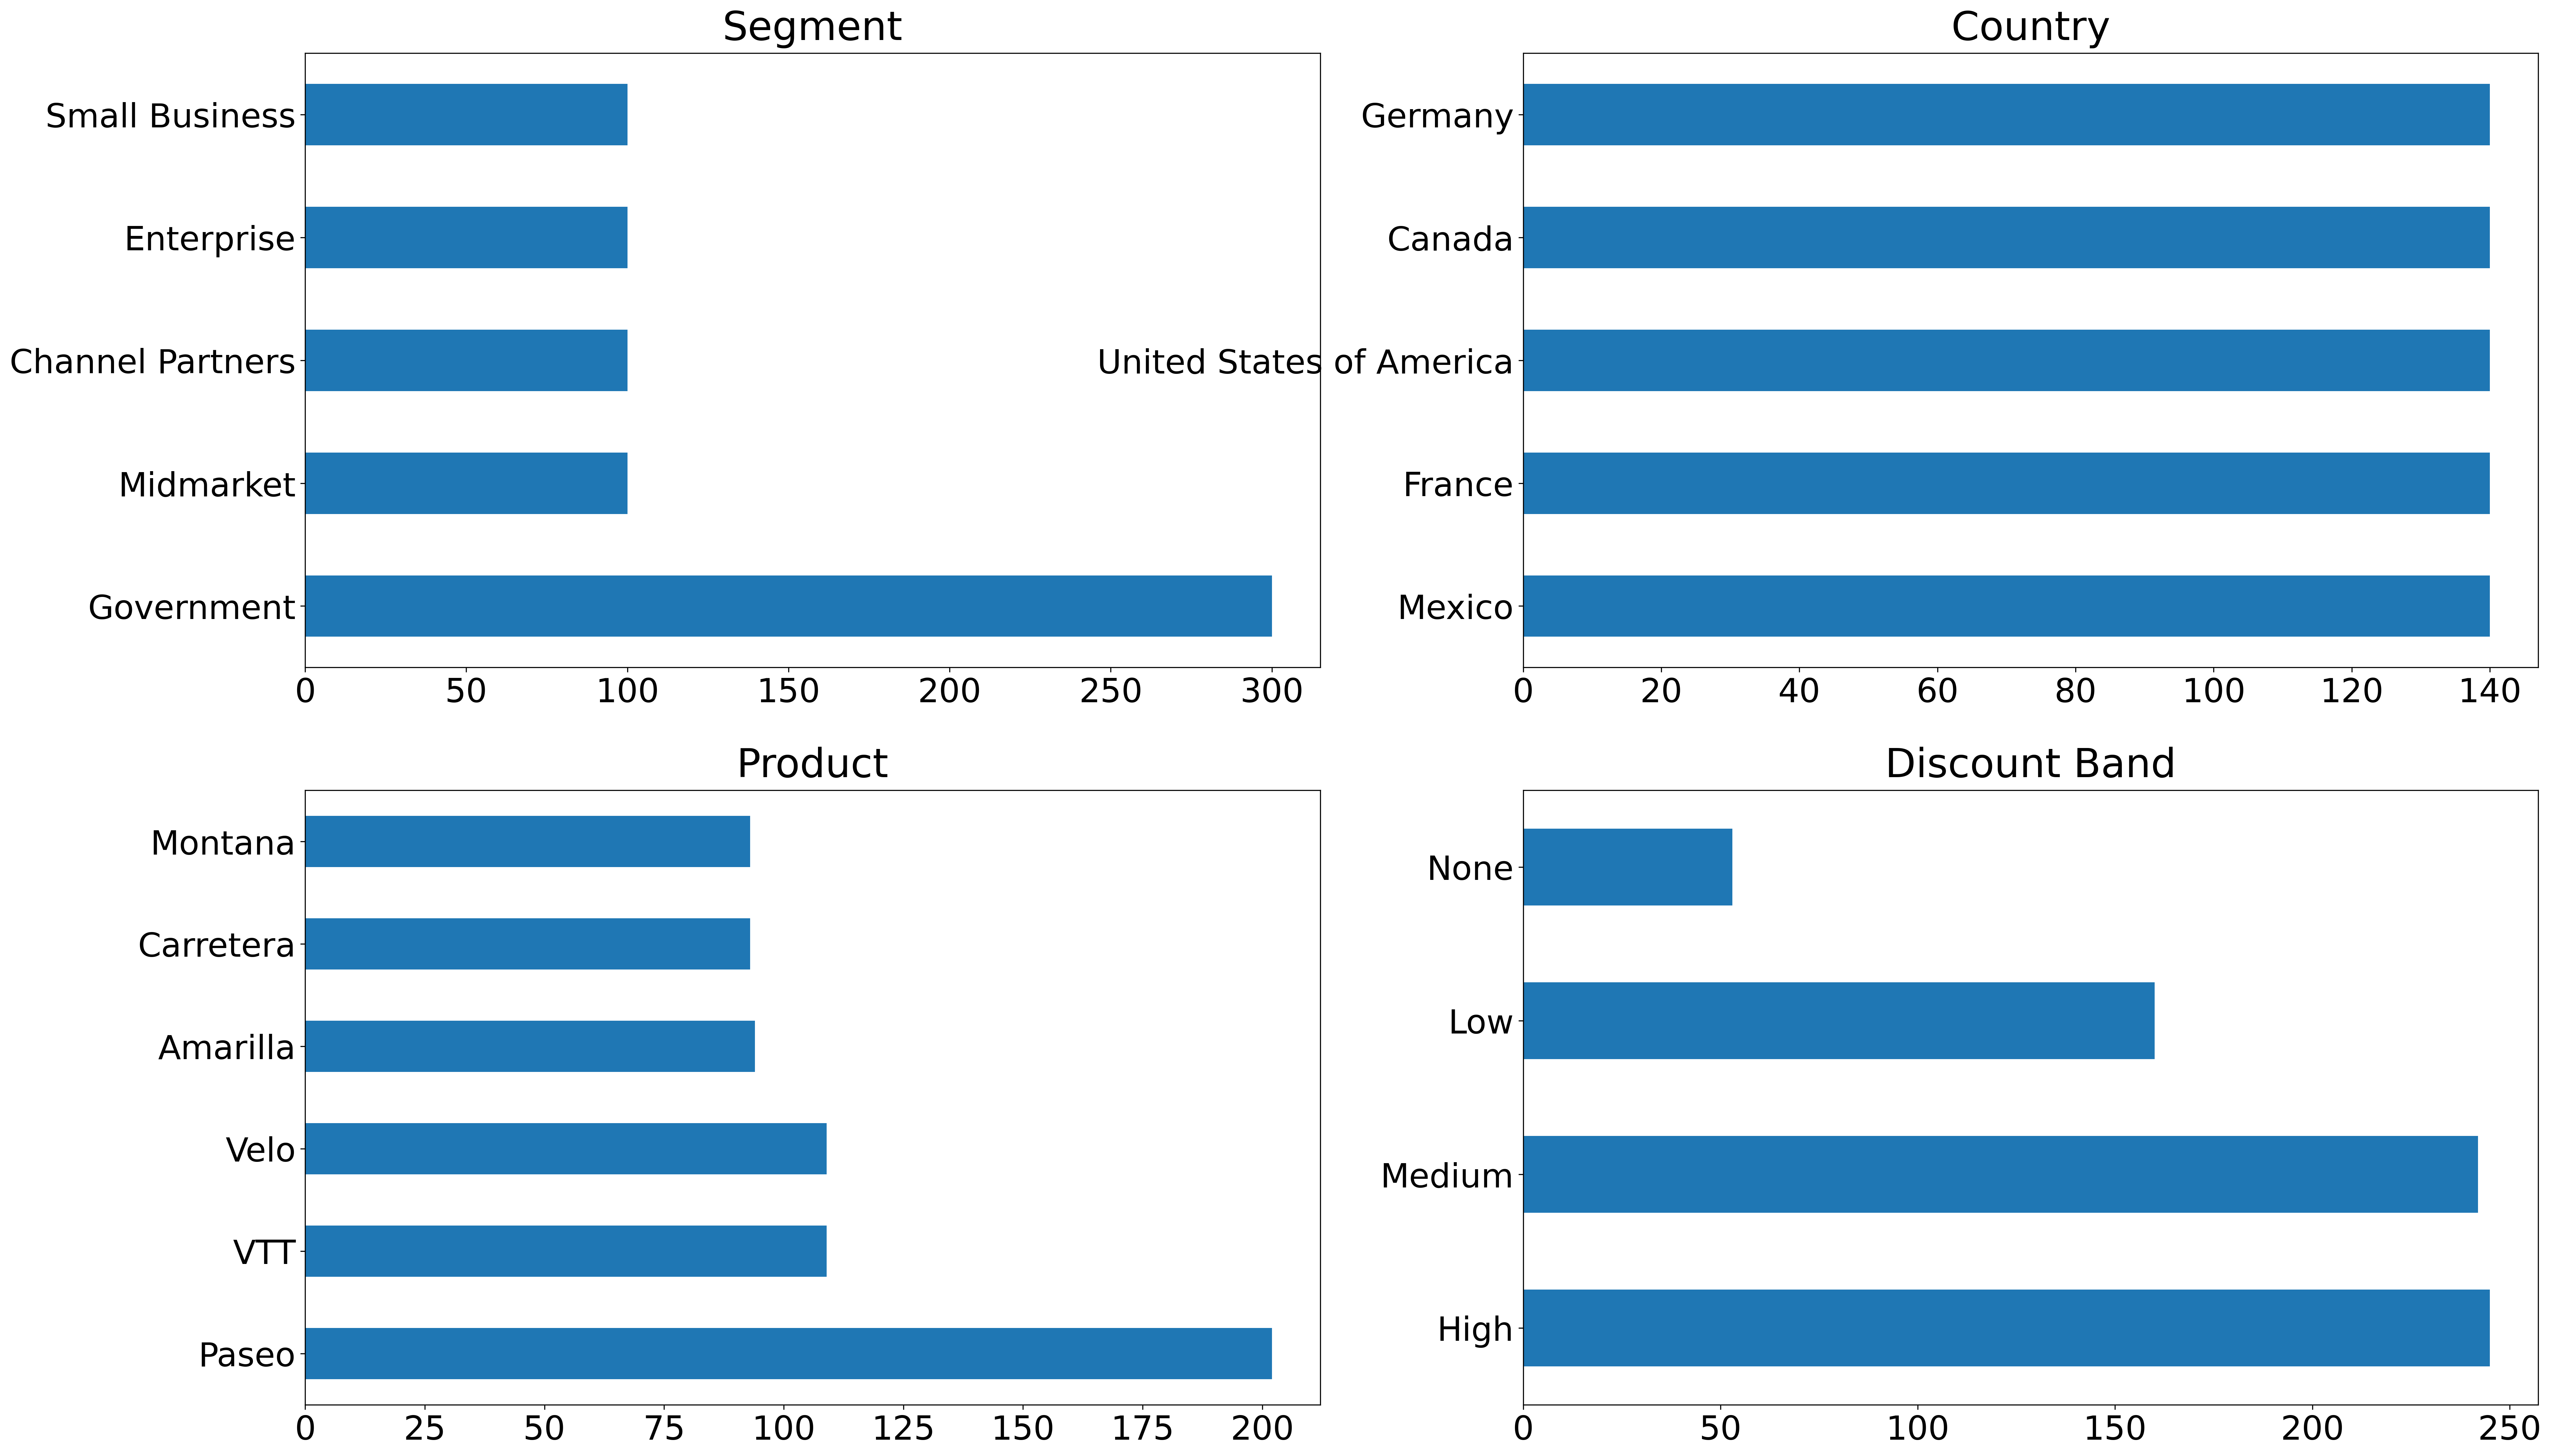

In [213]:
indices = np.where(financial_clean.dtypes == 'object')[0];
objects = financial_clean.iloc[:, indices];

frequency_tables = objects.value_counts();

plt.figure(figsize=(30, 100), dpi=300);
# Loop through the features, and display a bar plot of their respective frequency table.
for index, feature in enumerate(objects.columns):
    plt.subplot(10, 2, index+1);
    
    # Produce the frequency table
    table = objects[feature].value_counts();
    
    plt.title("{0}".format(feature), pad=10, fontdict={'fontsize': 30});
    #plot the graph
    table.plot(kind='barh', fontsize=25);

    
print("All the categories are correctly spelled and there is no overlapping of naming.");

### Outliers.

### Cross-Field Examination

In [214]:
# Conditions which affect multiple fields of data in
# a particular form.

# sales = Gross_sales - Discounts
if np.all(financial_clean['Sales'] == financial_clean['Gross Sales'] - financial_clean['Discounts']):
    print("Sales are valid.");
else: 
    print("Sales need cleaning");

financial_clean.columns.to_list()

truth_values_sales = financial_clean['Sales'] == financial_clean['Gross Sales'] - financial_clean['Discounts'];
problematic_sales = financial_clean.iloc[np.where(truth_values_sales == False)[0]];


# Removing those error rows
financial_clean = financial_clean.drop(np.where(truth_values_sales == False)[0], axis=0).copy();
#reset the index
financial_clean = financial_clean.reset_index(drop=True).copy();
print("After removal value: {0}.".format(financial_clean.shape));

Sales need cleaning
After removal value: (688, 13).


In [218]:
# Dealing with the problematic sales data
#problematic_sales
#financial_clean.iloc[np.where(truth_values_sales == False)[0]]

# Data Analysis.

## Descriptive analysis: What happened ?

In [222]:
# Which product has the best sales per country ?
# Which product has the least sales per country ?
# Which product has the least sale in one country 
    # and rather has encouraging sales in another
    # country.
financial_clean.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

Text(0.5, 1.0, 'Product count per Country')

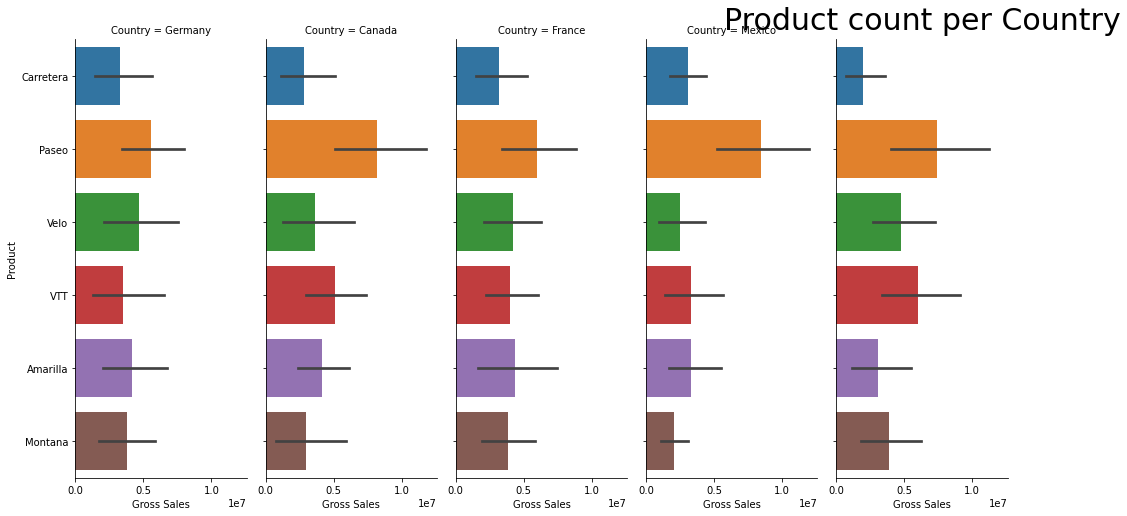

In [280]:
# Plotting pivot most bought product per country.

sns.catplot(data=financial_clean, y="Product", x="Gross Sales",
            col="Country", estimator=np.sum, height=7, aspect=0.4, kind="bar")
plt.title("Product count per Country", fontdict={'fontsize': 30}, pad=10)
# pivot_on_sales

## 